# Example notebook showing how to interactively perform a spectral analysis

## Define ON region

In [53]:
from gammapy.region import SkyCircleRegion
from astropy.coordinates import SkyCoord, Angle

center = SkyCoord.from_name('crab')
radius = Angle('0.3 deg')
on_region = SkyCircleRegion(pos = center, radius = radius)

## Define background method

In [54]:
bkg_method = dict(type='reflected', n_min=1)

## Define Energy binning

In [55]:
from gammapy.utils.energy import EnergyBounds

bounds = EnergyBounds.equal_log_spacing(1,10,40, unit='TeV')

## Make exclusion mask

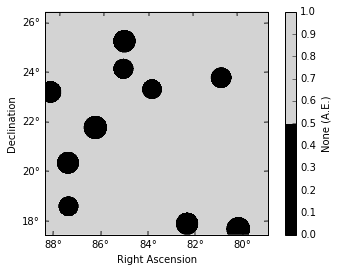

In [56]:
%matplotlib inline
from gammapy.image import ExclusionMask
from astropy.wcs import WCS
import matplotlib.pyplot as plt


mask = ExclusionMask.empty(nxpix = 901, nypix =901, binsz=0.01, coordsys='CEL',
                           xref=on_region.pos.ra.value, yref=on_region.pos.dec.value, 
                           dtype=int, fill=1)

mask.fill_random_circles(n=10, min_rad=50)

mask.plot()


## Define Data

In [57]:
from gammapy.data import DataStore
datastore = DataStore.from_dir('$GAMMAPY_EXTRA/datasets/hess-crab4-hd-hap-prod2/')
observations = datastore.obs_table.select_obs_id([23523, 23559])
print(observations)

ALT_PNT  AZ_PNT  DEADC   DEC_OBJ ...  TSTOP       TSTOP_STR      ZEN_PNT
------- ------- -------- ------- ... ------- ------------------- -------
40.6062 26.5339 0.937603 22.0144 ... 53343.9 2004-12-04 22:33:17 49.3938
44.2392 8.70994 0.936016 22.0144 ... 53346.0 2004-12-06 23:30:21 45.7608


## Make Spectrum Extraction instance

In [58]:
from gammapy.spectrum import SpectrumExtraction
extraction = SpectrumExtraction(datastore = datastore, obs_table = observations, on_region = on_region,
                           bkg_method = bkg_method, exclusion = mask, ebounds = bounds)
extraction.run(outdir='spectrum_example')

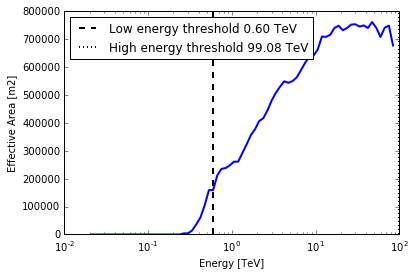

In [59]:
obs = extraction.observations[0]
obs.effective_area.plot()

In [60]:
from gammapy.spectrum import SpectrumFit
fit = SpectrumFit.from_observation_table_file('spectrum_example/observation_table.fits')
fit.model='PL'
fit.run(outdir = 'spectrum_example')

read ARF file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/arf_run23523.fits


INFO:sherpa.astro.io:read ARF file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/arf_run23523.fits


read RMF file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/rmf_run23523.fits


INFO:sherpa.astro.io:read RMF file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/rmf_run23523.fits


read background file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/bkg_run23523.fits


INFO:sherpa.astro.io:read background file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/bkg_run23523.fits


read ARF file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/arf_run23559.fits


INFO:sherpa.astro.io:read ARF file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/arf_run23559.fits


read RMF file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/rmf_run23559.fits


INFO:sherpa.astro.io:read RMF file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/rmf_run23559.fits


read background file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/bkg_run23559.fits


INFO:sherpa.astro.io:read background file /home/kingj/Software/gammapy-extra/notebooks/spectrum_example/ogip_data/bkg_run23559.fits


Datasets              = 1, 2
Method                = levmar
Statistic             = wstat
Initial fit statistic = 404.065
Final fit statistic   = 78.9459 at function evaluation 65
Data points           = 80
Degrees of freedom    = 78
Probability [Q-value] = 0.448766
Reduced statistic     = 1.01213
Change in statistic   = 325.119
   powlaw1d.default.gamma   2.36338     
   powlaw1d.default.ampl   2.75089     


INFO:sherpa.astro.ui.utils:Datasets              = 1, 2
Method                = levmar
Statistic             = wstat
Initial fit statistic = 404.065
Final fit statistic   = 78.9459 at function evaluation 65
Data points           = 80
Degrees of freedom    = 78
Probability [Q-value] = 0.448766
Reduced statistic     = 1.01213
Change in statistic   = 325.119
   powlaw1d.default.gamma   2.36338     
   powlaw1d.default.ampl   2.75089     


Datasets              = 1, 2
Confidence Method     = covariance
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = wstat
covariance 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   powlaw1d.default.gamma      2.36338    -0.149849     0.149849
   powlaw1d.default.ampl      2.75089    -0.395017     0.395017


INFO:sherpa.ui.utils:Datasets              = 1, 2
Confidence Method     = covariance
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = wstat
covariance 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   powlaw1d.default.gamma      2.36338    -0.149849     0.149849
   powlaw1d.default.ampl      2.75089    -0.395017     0.395017


[]

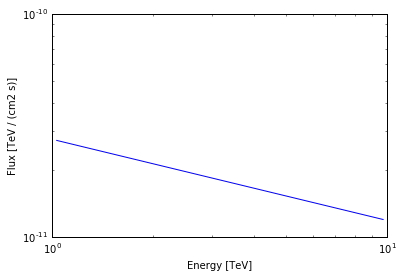

In [61]:
from gammapy.spectrum import SpectrumFitResult
import matplotlib.pyplot as plt

result = SpectrumFitResult.from_yaml('spectrum_example/fit_result_PowerLaw.yaml')
result.plot(energy_power=2)
plt.loglog()
